In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv("/home/aaliya/Documents/work/vit_dump/ml/Seed_Data.csv")
data

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [9]:
#Splitting features and scaling them
X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#pd.DataFrame(X_scaled, columns=X.columns).head()

In [14]:
#(1)
#Evaluating decision tree classifier :

#80-20 split
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#gini criteria
dt_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=42)
#5-Fold cross validation
cv_scores_gini_80 = cross_val_score(dt_gini_80, X_train_80, y_train_80, cv=5)
mean_cv_gini_80 = cv_scores_gini_80.mean()
print(f"80-20 Split (Gini): Cross-Validation Accuracy = {mean_cv_gini_80:.4f}")


#entropy criteria
dt_entropy_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
#5-Fold cross
cv_scores_entropy_80 = cross_val_score(dt_entropy_80, X_train_80, y_train_80, cv=5)
mean_cv_entropy_80 = cv_scores_entropy_80.mean()
print(f"80-20 Split (Entropy): Cross-Validation Accuracy = {mean_cv_entropy_80:.4f}")



#70-30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#gini
dt_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=42)
cv_scores_gini_70 = cross_val_score(dt_gini_70, X_train_70, y_train_70, cv=5)
mean_cv_gini_70 = cv_scores_gini_70.mean()
print(f"70-30 Split (Gini): Cross-Validation Accuracy = {mean_cv_gini_70:.4f}")

#entropy
dt_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=42)
cv_scores_entropy_70 = cross_val_score(dt_entropy_70, X_train_70, y_train_70, cv=5)
mean_cv_entropy_70 = cv_scores_entropy_70.mean()
print(f"70-30 Split (Entropy): Cross-Validation Accuracy = {mean_cv_entropy_70:.4f}")


80-20 Split (Gini): Cross-Validation Accuracy = 0.8932
80-20 Split (Entropy): Cross-Validation Accuracy = 0.8873
70-30 Split (Gini): Cross-Validation Accuracy = 0.8984
70-30 Split (Entropy): Cross-Validation Accuracy = 0.8915


In [16]:
#conc
print("Therefore, gini with 70-30 split gives the best configuration with an accuracy of 0.8984")
#Therefore we plot that decision tree

Therefore, gini with 70-30 split gives the best configuration with an accuracy of 0.8984


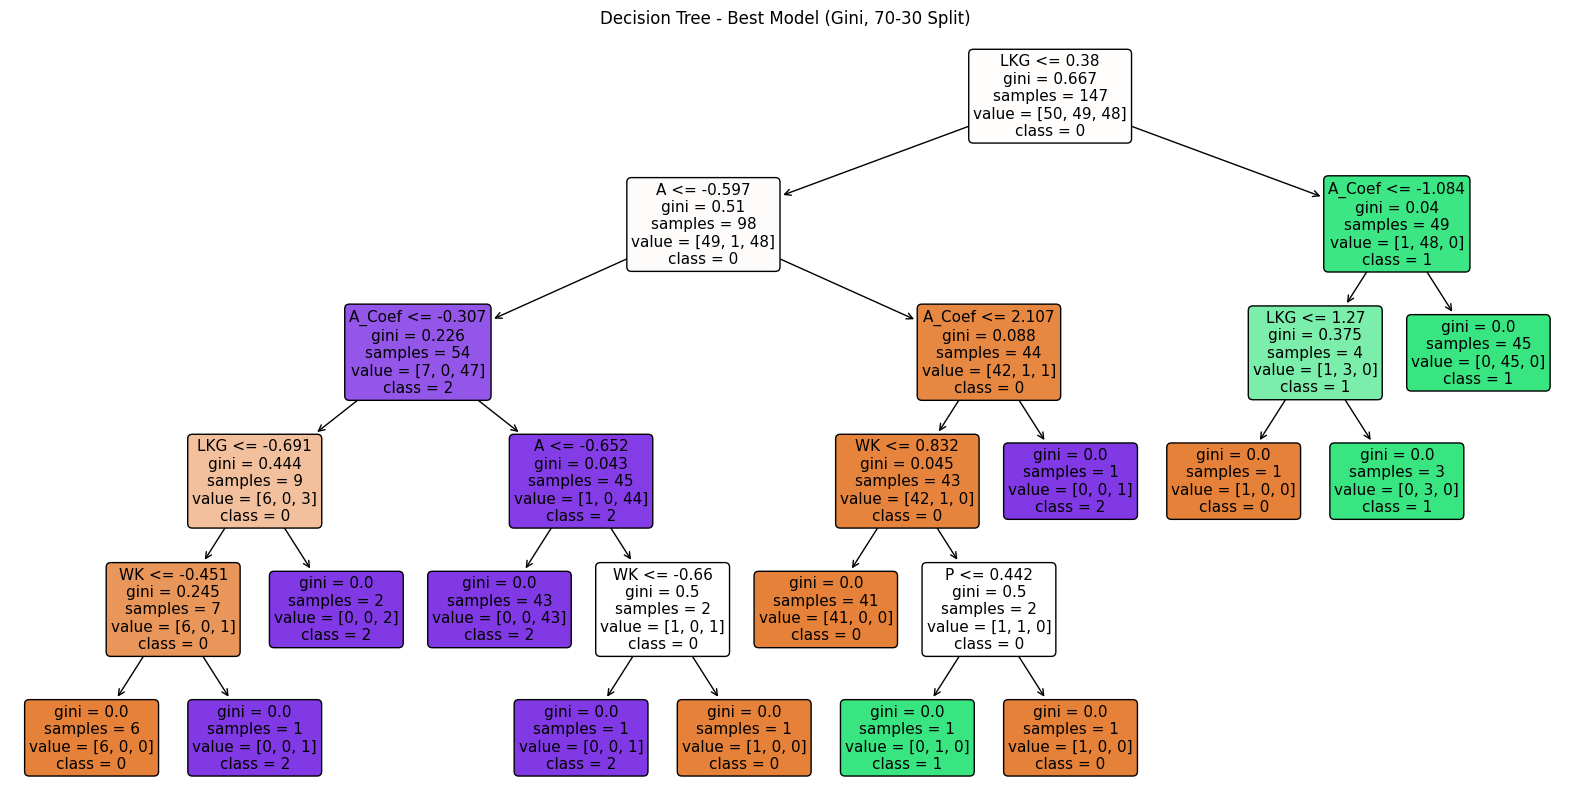

In [17]:
#(2)
X_train, X_test, y_train, y_test = X_train_70, X_test_70, y_train_70, y_test_70

best_dt = DecisionTreeClassifier(criterion='gini', random_state=42)

best_dt.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, rounded=True)
plt.title('Decision Tree - Best Model (Gini, 70-30 Split)')
plt.savefig('best_decision_tree.png')
plt.show()

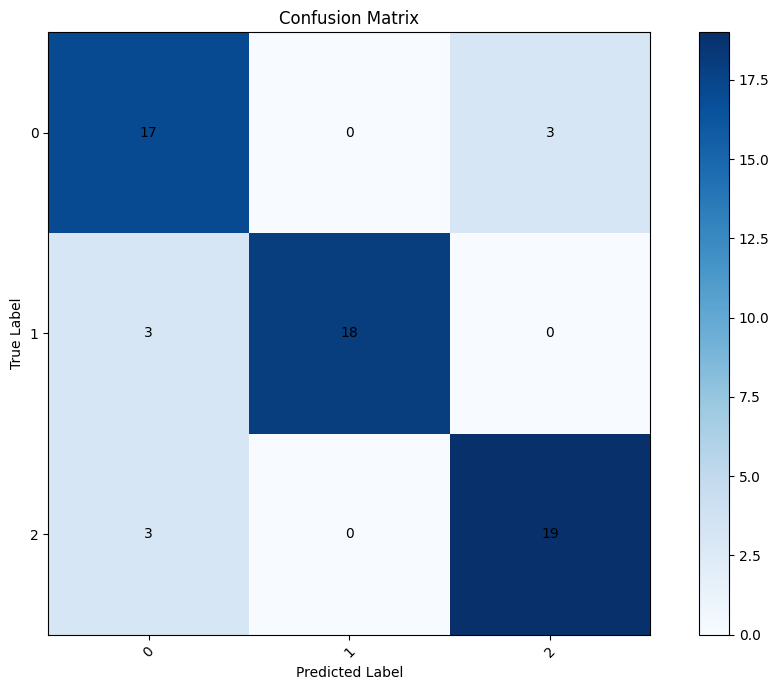


Accuracy: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       1.00      0.86      0.92        21
           2       0.86      0.86      0.86        22

    accuracy                           0.86        63
   macro avg       0.87      0.86      0.86        63
weighted avg       0.87      0.86      0.86        63



In [19]:
#(3)
#Measure the performance metrics with Accuracy and plot the confusion matrix for the best-classified model

y_pred = best_dt.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45)
plt.yticks(tick_marks, y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#Labels for conf matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")

plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

#Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Feature Importance:
  feature  importance
6     LKG    0.508574
0       A    0.356032
5  A_Coef    0.087757
4      WK    0.037431
1       P    0.010205
2       C    0.000000
3      LK    0.000000


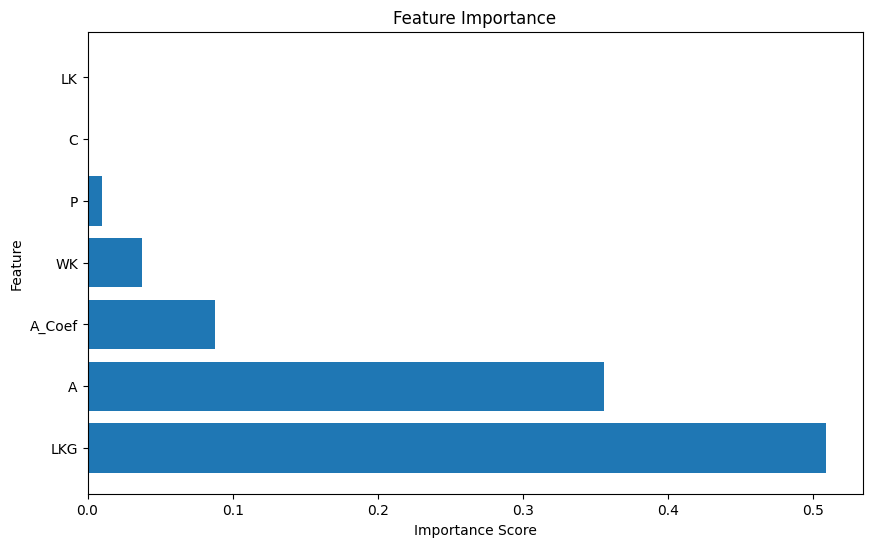

In [20]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_dt.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.savefig('feature_importance.png')
plt.show()


**Conclusion:**
---------------------
The best model uses a 70-30 train-test split with the Gini criterion.
It achieves an accuracy of 0.8984 based on cross-validation.
The most important features for classification are LKG, A, A_Coef.